In [15]:
import argparse
from collections import defaultdict
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import scanpy as sp
from scipy.stats import spearmanr
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm

In [38]:
score = "ReadZS"
score2 = "ReadZS_ge"

# score = "SpliZ_norm"
# score2 = "ge_norm"

# score = "ReadZS_norm"
# score2 = "ReadZS_ge_norm"

scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score]
srow2 = scores.loc[score2]

dataname = "V1_Mouse_Kidney"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
# dataname = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"
# dataname = "Visium_FFPE_Mouse_Kidney"
# dataname = "Visium_FFPE_Human_Prostate_IF"
# dataname = "Visium_FFPE_Human_Breast_Cancer"
samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
# samples
row = samples.loc[dataname]

# change way of getting corr depending on score

# if score == "ReadZS":
#   corr = pd.read_csv(row["pixcorr_readzs"],sep="\t")


if row[srow["valname"]].endswith(".pq"):
  spliz_df = pd.read_parquet(row[srow["valname"]])
else:
  spliz_df = pd.read_csv(row[srow["valname"]],sep="\t")
  

  
if row[srow2["valname"]].endswith(".pq"):
  spliz_df2 = pd.read_parquet(row[srow2["valname"]])
else:
  spliz_df2 = pd.read_csv(row[srow2["valname"]],sep="\t")

spliz_df["gene_cell"] = spliz_df[srow["genecol"]] + "_" + spliz_df[srow["cellid"]]
spliz_df2["gene_cell"] = spliz_df2[srow2["genecol"]] + "_" + spliz_df2[srow2["cellid"]]

# create_dict = False
# create_file = False
# if create_dict:
  
  
  
#   ens_path = "/oak/stanford/groups/horence/JuliaO/data/visium/ensembl_windows.txt"
#   ens = pd.read_csv(ens_path,sep="\t")
#   if create_file:
#     gtf_file = "/oak/stanford/groups/horence/rob/readzs_fork/gencode.vM10.annotation.gff3"
#     gtf = load_gtf(gtf_file,True)
#     gtf = gtf.drop_duplicates("gene_id")
#     ens["chrom"] = ens["gene_id"].map({k : v for k, v in zip(gtf["gene_id"],gtf["seqname"])}) 
#     ens["strand"] = ens["gene_id"].map({k : v for k, v in zip(gtf["gene_id"],gtf["strand"])}) 
#     ens["sign"] = ens["strand"].map({"+" : "plus", "-" : "minus"})
#     ens["full_window"] = ens["chrom"] + "_" + ens["window"].astype(str) + "_" + ens["sign"]
#     df = pd.read_csv("/oak/stanford/groups/horence/rob/readzs_fork/mouse_gene_name_ids.csv")
#     df["gene_id"] = df["gene_id"].str.split(".").str[0]
#   #   ens_dict = {k:v for k, v in zip(spliz_df["ensembl"],spliz_df["gene"])}
#     window_dict = {k : v for k, v in zip(ens["window"],ens["gene_id"])}
#     ens["gene_name"] = ens["gene_id"].map({k : v for k, v in zip(df["gene_id"],df["gene_name"])})
#     ens.to_csv(ens_path,sep="\t",index=False)
#   name_dict = defaultdict(lambda  : "")
#   for win, windf in tqdm(ens.dropna().drop_duplicates(["full_window","gene_name"]).groupby("full_window")):
#     name_dict[win] = ",".join(list(windf["gene_name"]))
  
# add_gene_names = False
# if add_gene_names:


#   corr["gene"] = corr["window"].map(name_dict)
#   corr.to_csv(row["pixcorr_readzs"],sep="\t",index=False)

In [39]:
# get rid of outliers
while (list(spliz_df["plot_xcoord"].sort_values().unique())[1] - list(spliz_df["plot_xcoord"].sort_values().unique())[0]) > 1000:

  spliz_df = spliz_df[spliz_df["plot_xcoord"] > list(spliz_df["plot_xcoord"].sort_values())[0]]
  
while (list(spliz_df["plot_xcoord"].sort_values().unique())[-1] - list(spliz_df["plot_xcoord"].sort_values().unique())[-2]) > 1000:

  spliz_df = spliz_df[spliz_df["plot_xcoord"] < list(spliz_df["plot_xcoord"].sort_values())[-1]]


In [40]:
# get rid of outliers
while (list(spliz_df2["plot_xcoord"].sort_values().unique())[1] - list(spliz_df2["plot_xcoord"].sort_values().unique())[0]) > 1000:

  spliz_df2 = spliz_df2[spliz_df2["plot_xcoord"] > list(spliz_df2["plot_xcoord"].sort_values())[0]]
  
while (list(spliz_df2["plot_xcoord"].sort_values().unique())[-1] - list(spliz_df2["plot_xcoord"].sort_values().unique())[-2]) > 1000:

  spliz_df2 = spliz_df2[spliz_df2["plot_xcoord"] < list(spliz_df2["plot_xcoord"].sort_values())[-1]]


In [41]:

outpath = "output/plot_val_ge/"


thresh = 5
xcol = "plot_xcoord"
ycol = "plot_ycoord"
alpha = 0.2

Image.MAX_IMAGE_PIXELS = 691964736
im = Image.open(row["image"])
graydf = spliz_df.drop_duplicates(srow["cellid"])

chr11_6460_plus
(1432, 18)
(1432, 21)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


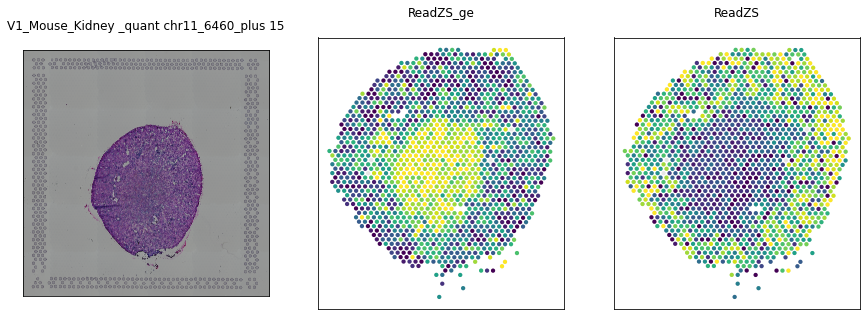

chr6_26770_minus
(1432, 18)
(1432, 21)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


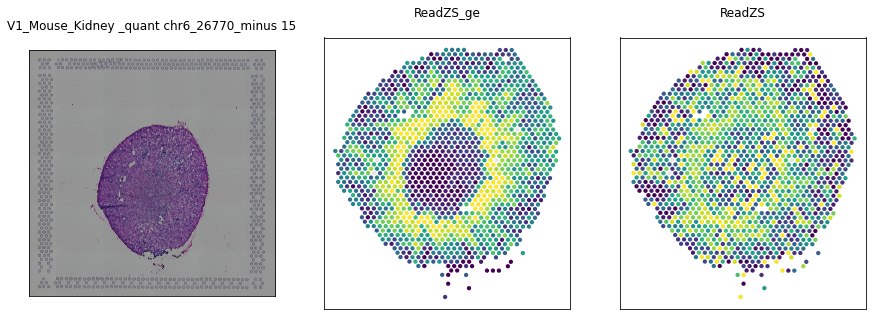

chr7_20766_minus
(1434, 18)
(1434, 21)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


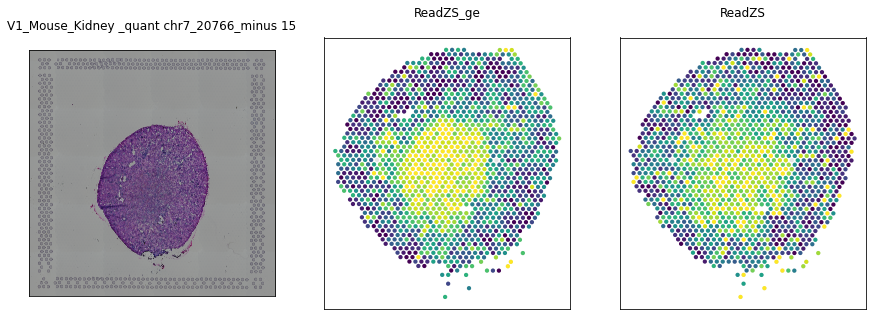

chr11_10983_plus
(1433, 18)
(1433, 21)


/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


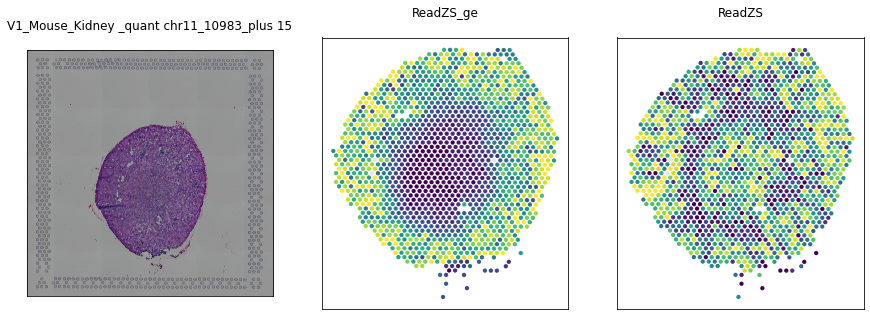

In [45]:

# grouping_level_2 = "circle"
# grouping_level_2 = "quadrant"
grouping_level_2 = ""
thresh = 0
upper = 1
lower = 0
palette0 = "viridis"
palette1 = "viridis"
palette2 = "vlag"
legval = True
num_quant = 15
show_image = True
# suffs = ["","_quant"]
suffs = ["_quant"]

xhalf = (graydf["plot_xcoord"].max() - graydf["plot_xcoord"].min())/2 + graydf["plot_xcoord"].min()
yhalf = (graydf["plot_ycoord"].max() - graydf["plot_ycoord"].min())/2 + graydf["plot_ycoord"].min()
radius = ((xhalf - graydf["plot_xcoord"].min())/2 + (yhalf - graydf["plot_ycoord"].min())/2)/2

if dataname == "V1_Mouse_Kidney":
  size = 10
else:
  size = 3
  
# for gene in ["Myl6","Rps24","Gng13"]:
for gene in ["chr11_6460_plus","chr6_26770_minus","chr7_20766_minus","chr11_10983_plus"]:
  print(gene)
  gene_df = spliz_df[spliz_df[srow["genecol"]] == gene]
  print(gene_df.shape)
  gene_df2 = spliz_df2[spliz_df2[srow2["genecol"]] == gene]
  print(gene_df2.shape)

  if gene_df.shape[0] > thresh:
    
  
    gene_df[srow["col"] + "_quant"] = 1
    
    for i in range(1,num_quant):

      gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(i/num_quant),srow["col"] + "_quant"] = i + 1
#     gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(.5),srow["col"] + "_quant"] = 3
#     gene_df.loc[gene_df[srow["col"]] > gene_df[srow["col"]].quantile(.75),srow["col"] + "_quant"] = 4
    
    
    gene_df2[srow2["col"] + "_quant"] = 1
    for i in range(1,num_quant):
      gene_df2.loc[gene_df2[srow2["col"]] > gene_df2[srow2["col"]].quantile(i/num_quant),srow2["col"] + "_quant"] = i + 1

    
    gene_df[srow2["col"]] = gene_df["gene_cell"].map({x : y for x, y in zip(gene_df2["gene_cell"],gene_df2[srow2["col"]])})
    gene_df[srow2["col"] + "_quant"] = gene_df["gene_cell"].map({x : y for x, y in zip(gene_df2["gene_cell"],gene_df2[srow2["col"] + "_quant"])})
    gene_df["diff"] = gene_df[srow["col"]] - gene_df[srow2["col"]]
    gene_df["diff_quant"] = gene_df[srow["col"] + "_quant"] - gene_df[srow2["col"] + "_quant"]
    gene_df["diff2"] = (5 - gene_df[srow["col"]]) - gene_df[srow2["col"]]
    gene_df["diff2_quant"] = (5 - gene_df[srow["col"] + "_quant"]) - gene_df[srow2["col"] + "_quant"]
    for suff in suffs:
      fig, axs = plt.subplots(1,3, figsize=(15,5))

      # instead of this, have quant for other
  #     sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  #     sns.scatterplot(ax=axs[1],data = gene_df, x = xcol, y = ycol, hue = srow["col"],size=3,linewidth=0,palette="viridis",legend=legval)

      sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=size,linewidth=0,legend=False)
      sns.scatterplot(ax=axs[1],data = gene_df2, x = xcol, y = ycol, hue = srow2["col"] + suff,size=size,linewidth=0,palette=palette0,legend=False)
      axs[1].set(xlabel=None)
      axs[1].set(ylabel=None)      
      axs[1].axes.xaxis.set_visible(False)
      axs[1].axes.yaxis.set_visible(False)
      sns.scatterplot(ax=axs[2],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=size,linewidth=0,legend=False)
      sns.scatterplot(ax=axs[2],data = gene_df, x = xcol, y = ycol, hue = srow["col"] + suff,size=size,linewidth=0,palette=palette1,legend=False)    
      axs[2].set(xlabel=None)
      axs[2].set(ylabel=None) 
      
#       sns.scatterplot(ax=axs[1,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
#       sns.scatterplot(ax=axs[1,1],data = gene_df, x = xcol, y = ycol, hue = "diff" + suff,size=3,linewidth=0,palette=palette2,legend=False)    
#       axs[1,1].set(xlabel=None)
#       axs[1,1].set(ylabel=None) 
      
#       sns.scatterplot(ax=axs[1,2],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
#       sns.scatterplot(ax=axs[1,2],data = gene_df, x = xcol, y = ycol, hue = "diff2" + suff,size=3,linewidth=0,palette=palette2,legend=legval)    
#       axs[1,2].set(xlabel=None)
#       axs[1,2].set(ylabel=None) 
      
      axs[2].axes.xaxis.set_visible(False)
      axs[2].axes.yaxis.set_visible(False)
      if grouping_level_2 == "quadrant":
        axs[2].axhline(y=yhalf,color="red",linewidth=3)
        axs[2].axvline(x=xhalf,color="red",linewidth=3)
      axs[0].axes.xaxis.set_visible(False)
      axs[0].axes.yaxis.set_visible(False)
      axs[1].set_title(score2 + "\n")
      axs[2].set_title(score + "\n")
# #       print(axs[2].get_y)
      axs[2].set_xlim([min(axs[1].get_xlim()[0],axs[2].get_xlim()[0]),max(axs[1].get_xlim()[1],axs[2].get_xlim()[1])])
      axs[2].set_ylim([min(axs[1].get_ylim()[0],axs[2].get_ylim()[0]),max(axs[1].get_ylim()[1],axs[2].get_ylim()[1])])
      if grouping_level_2 == "circle":
        axs[2].add_patch(plt.Circle((xhalf, yhalf), radius, color='red',linewidth=3,fill=False))
      axs[1].set_xlim([min(axs[1].get_xlim()[0],axs[2].get_xlim()[0]),max(axs[1].get_xlim()[1],axs[2].get_xlim()[1])])
      axs[1].set_ylim([min(axs[1].get_ylim()[0],axs[2].get_ylim()[0]),max(axs[1].get_ylim()[1],axs[2].get_ylim()[1])])
#       axs[1,1].set_xlim([min(axs[0,1].get_xlim()[0],axs[0,2].get_xlim()[0]),max(axs[0,1].get_xlim()[1],axs[0,2].get_xlim()[1])])
#       axs[1,1].set_ylim([min(axs[0,1].get_ylim()[0],axs[0,2].get_ylim()[0]),max(axs[0,1].get_ylim()[1],axs[0,2].get_ylim()[1])])
#       axs[1,2].set_xlim([min(axs[0,1].get_xlim()[0],axs[0,2].get_xlim()[0]),max(axs[0,1].get_xlim()[1],axs[0,2].get_xlim()[1])])
#       axs[1,2].set_ylim([min(axs[0,1].get_ylim()[0],axs[0,2].get_ylim()[0]),max(axs[0,1].get_ylim()[1],axs[0,2].get_ylim()[1])])
#   #       try:
# #         axs[1].set_title("{} {} {}".format(gene,score2,corrdf[corrdf[srow["gencol"]] == gene]["gene"].iloc[0]))
# #         axs[2].set_title("{} {} {}".format(gene,score,corrdf[corrdf[srow["gencol"]] == gene]["gene"].iloc[0]))
# #       except:
# #         axs[2].set_title("{} {} {}".format(gene,score, name_dict[gene]))
# #         axs[1].set_title("{} {} {}".format(gene,score2, name_dict[gene]))
      if show_image:
        axs[0].imshow(im)
#       axs[1,0].imshow(im)
#       plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
      
#       try:
      try:
        axs[0].set_title("{} {} {} {}\n{}\n".format(dataname,suff,gene,num_quant,name_dict[gene]))
      except:
        axs[0].set_title("{} {} {} {}\n".format(dataname,suff,gene, num_quant))

#       except:
      plt.savefig("{}{}_{}_{}_{}{}_{}.png".format(outpath,dataname,gene,score,score2,suff,num_quant),bbox_inches="tight")
      plt.show()